In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("../../dataset/laptopData.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


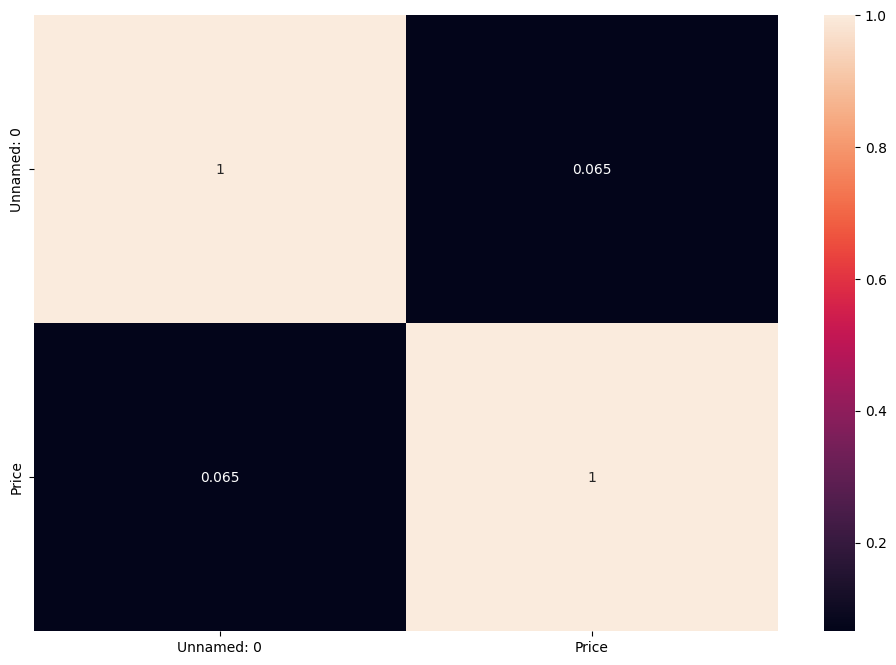

In [4]:
corr = df.select_dtypes(include=np.number).corr()
# dataplot = sb.heatmap(corr, annot=True)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
dataplot = sb.heatmap(corr, annot=True)
plt.show()


In [5]:
# show most popular songs
df.sort_values(by='Price', ascending=False).head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,196.0,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,324954.720
830,830.0,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,292986.720
610,610.0,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,261018.720
749,749.0,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,233845.920
1066,1066.0,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,211788.000
1136,1136.0,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia Quadro M3000M,Windows 7,3kg,210424.032
238,238.0,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.7kg,207259.200
723,723.0,Dell,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,194972.832
780,780.0,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42kg,191211.264
1231,1231.0,Razer,Gaming,14,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,186426.720


In [6]:
# check for null values
df.isnull().sum()


Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
# drop null values
df = df.dropna()

In [8]:
# extract the most important features
important_features = ['Company', 'TypeName','Inches', 'Ram', 'Cpu', 'Memory', 'Price']
df = df[important_features]
df.rename(columns={'Inches': 'ScreenSize'}, inplace=True)

In [9]:
def convert_memory(memory):
    try:
        if 'TB' in memory:
            memory = memory.split('TB')[0].strip()
            memory = pd.to_numeric(memory)
            return memory * 1024
        elif 'GB' in memory:
            memory = memory.split('GB')[0].strip()
            memory = pd.to_numeric(memory)
            return float(memory)
        return memory
    except ValueError:
        return None  # Return None for cases that cannot be converted

df['Memory'] = df['Memory'].apply(lambda x: convert_memory(x))

In [10]:
# remove the 'GB' from the Ram column
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df.dropna(inplace=True)

In [11]:
# extract CPU clock speed and convert to numeric
df['Cpu_Speed'] = df['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

C:\Users\71526\AppData\Local\Temp\ipykernel_32252\86718255.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [12]:
df

,Company,TypeName,ScreenSize,Ram,Cpu,Memory,Price,Cpu_Speed
0,Apple,Ultrabook,13.3,8,Intel Core i5 2.3GHz,128.0,71378.6832,2.3
1,Apple,Ultrabook,13.3,8,Intel Core i5 1.8GHz,128.0,47895.5232,1.8
2,HP,Notebook,15.6,8,Intel Core i5 7200U 2.5GHz,256.0,30636.0000,2.5
3,Apple,Ultrabook,15.4,16,Intel Core i7 2.7GHz,512.0,135195.3360,2.7
4,Apple,Ultrabook,13.3,8,Intel Core i5 3.1GHz,256.0,96095.8080,3.1
...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,4,Intel Core i7 6500U 2.5GHz,128.0,33992.6400,2.5
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel Core i7 6500U 2.5GHz,512.0,79866.7200,2.5
1300,Lenovo,Notebook,14,2,Intel Celeron Dual Core N3050 1.6GHz,64.0,12201.1200,1.6
1301,HP,Notebook,15.6,6,Intel Core i7 6500U 2.5GHz,1024.0,40705.9200,2.5


In [13]:
# scaling numeric data
# numeric_cols = ['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed']
# scaler = MinMaxScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [14]:
# label encoding categorical data
# label_encoder = LabelEncoder()
# df['Company'] = label_encoder.fit_transform(df['Company'])
# df['TypeName'] = label_encoder.fit_transform(df['TypeName'])
# df['Cpu'] = label_encoder.fit_transform(df['Cpu'])

# df

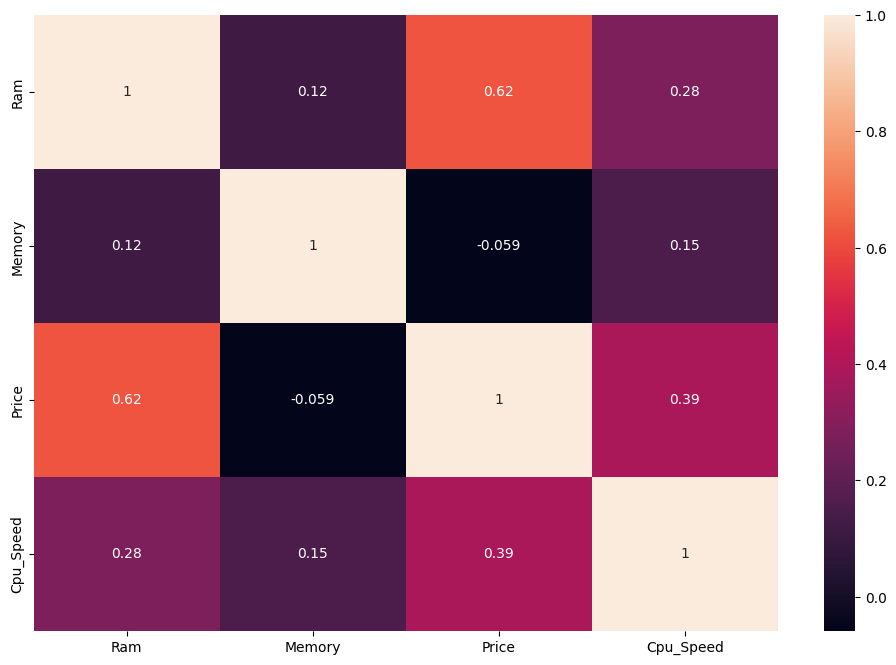

In [15]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))  # adjust the figure size as needed
dataplot = sb.heatmap(corr, annot=True)
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     999 non-null    object 
 1   TypeName    999 non-null    object 
 2   ScreenSize  999 non-null    object 
 3   Ram         999 non-null    int32  
 4   Cpu         999 non-null    object 
 5   Memory      999 non-null    float64
 6   Price       999 non-null    float64
 7   Cpu_Speed   999 non-null    float64
dtypes: float64(3), int32(1), object(4)
memory usage: 66.3+ KB


<Axes: >

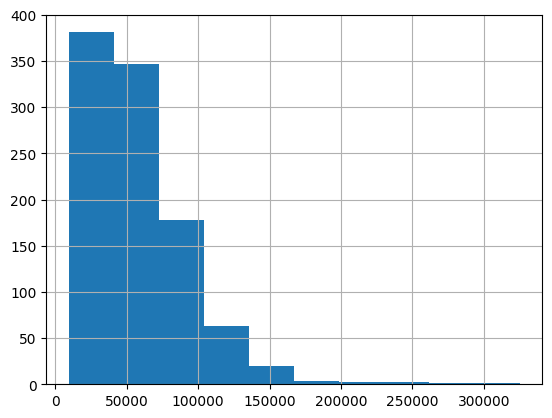

In [17]:
df.Price.hist()

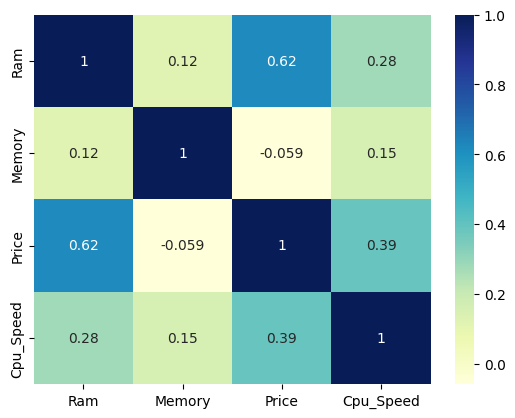

In [18]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

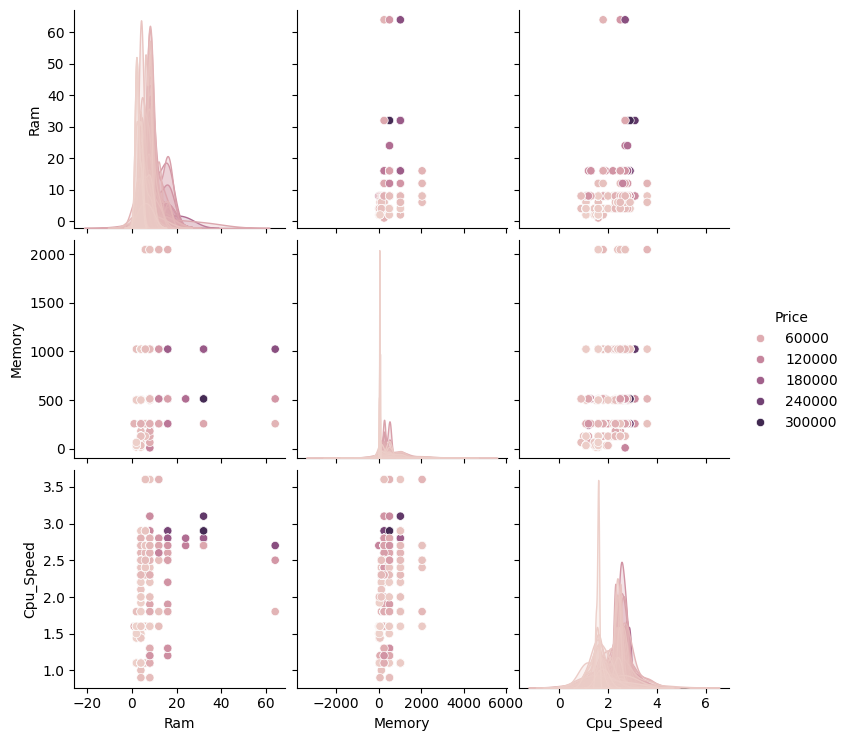

In [19]:
# pairplot with hue 
sb.pairplot(df, hue='Price')
# to show
plt.show()

In [20]:
categorical = df.select_dtypes(exclude = np.number).columns
categorical

Index(['Company', 'TypeName', 'ScreenSize', 'Cpu'], dtype='object')

In [21]:
df1 = df.copy()
classes = dict()
le = LabelEncoder()
for col in categorical:
    df1[col]= le.fit_transform(df1[col])
    classes[col] = le.classes_

df1

,Company,TypeName,ScreenSize,Ram,Cpu,Memory,Price,Cpu_Speed
0,1,4,7,8,56,128.0,71378.6832,2.3
1,1,4,7,8,54,128.0,47895.5232,1.8
2,7,3,14,8,65,256.0,30636.0000,2.5
3,1,4,13,16,75,512.0,135195.3360,2.7
4,1,4,7,8,58,256.0,96095.8080,3.1
...,...,...,...,...,...,...,...,...
1298,10,0,10,4,79,128.0,33992.6400,2.5
1299,10,0,7,16,79,512.0,79866.7200,2.5
1300,10,3,10,2,27,64.0,12201.1200,1.6
1301,7,3,14,6,79,1024.0,40705.9200,2.5


In [22]:
X = df1.drop(columns = 'Price').values
X

array([[1.000e+00, 4.000e+00, 7.000e+00, ..., 5.600e+01, 1.280e+02,
        2.300e+00],
       [1.000e+00, 4.000e+00, 7.000e+00, ..., 5.400e+01, 1.280e+02,
        1.800e+00],
       [7.000e+00, 3.000e+00, 1.400e+01, ..., 6.500e+01, 2.560e+02,
        2.500e+00],
       ...,
       [1.000e+01, 3.000e+00, 1.000e+01, ..., 2.700e+01, 6.400e+01,
        1.600e+00],
       [7.000e+00, 3.000e+00, 1.400e+01, ..., 7.900e+01, 1.024e+03,
        2.500e+00],
       [2.000e+00, 3.000e+00, 1.400e+01, ..., 2.700e+01, 5.000e+02,
        1.600e+00]])

In [23]:
y = df1['Price'].values
y

array([ 71378.6832,  47895.5232,  30636.    , 135195.336 ,  96095.808 ,
       114017.6016,  61735.536 ,  79653.6   ,  41025.6   ,  20986.992 ,
       130001.6016,  67260.672 ,  80908.344 ,  39693.6   , 152274.24  ,
        26586.72  ,  52161.12  ,  13746.24  ,  43636.32  ,  35111.52  ,
        58554.72  ,  42624.    ,  69157.44  ,  47738.88  ,  13053.0672,
        10602.72  ,  23389.92  ,  99580.32  ,  53173.44  ,  13266.72  ,
        19553.76  ,  26037.4032,  46833.12  ,  27864.9072,  36336.96  ,
        53226.72  ,  75604.32  ,  34045.92  ,  24828.48  ,  44808.48  ,
        21231.5472,  58767.84  ,  20459.52  ,  40908.384 ,  31232.2032,
        46833.12  ,  31914.72  ,  50136.48  ,  36763.2   , 105654.24  ,
        12201.12  ,  29250.72  ,  50562.72  ,  58021.92  ,  50882.4   ,
        46353.6   ,  50562.72  ,  27652.32  ,  28238.4   ,  58403.4048,
        80452.8   ,  45820.8   ,  21258.72  ,  37242.72  ,  31914.1872,
        87858.72  ,  36709.92  ,  63776.16  ,  63669.6   ,  5589

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.shape

(300, 7)

In [25]:
reg = LinearRegression() # ols
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([19117.6929214 , 61556.09292814, 73887.91844864, 77932.99013612,
       50950.40392141, 54740.8751899 ,  9377.31185628, 63713.02029682,
       65696.16755069, 58972.00706501])

In [27]:
y_test[:10]

array([ 19127.52  ,  78268.32  ,  58448.16  ,  76030.56  ,  42943.68  ,
        52480.8   ,  19660.32  ,  53226.72  ,  50562.72  , 104588.1072])

In [28]:
np.mean(np.square(y_test - y_pred))

585785185.1684749

In [29]:
np.mean(np.absolute(y_test - y_pred))

16294.623196203942

In [30]:
min(y), max(y)

(9270.72, 324954.72)

In [31]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.5318512852113126

In [32]:
np.mean(np.abs(y_pred-y_test))

16294.623196203942

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)


(0.5318512852113126, 585785185.1684749, 16294.623196203942)

In [34]:
y_bar = np.mean(y_test)
1 - np.sum(np.square(y_pred-y_test))/np.sum(np.square(y_test-y_bar))

0.5318512852113126

In [35]:
# scaling numeric data
numeric_cols = ['ScreenSize', 'Ram', 'Memory', 'Price', 'Cpu_Speed']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [36]:
# label encoding categorical data
label_encoder = LabelEncoder()
df['Company'] = label_encoder.fit_transform(df['Company'])
df['TypeName'] = label_encoder.fit_transform(df['TypeName'])
df['Cpu'] = label_encoder.fit_transform(df['Cpu'])

df

,Company,TypeName,ScreenSize,Ram,Cpu,Memory,Price,Cpu_Speed
0,1,4,0.125490,0.111111,56,0.058824,0.196741,0.518519
1,1,4,0.125490,0.111111,54,0.058824,0.122353,0.333333
2,7,3,0.215686,0.111111,65,0.121569,0.067679,0.592593
3,1,4,0.207843,0.238095,75,0.247059,0.398895,0.666667
4,1,4,0.125490,0.111111,58,0.121569,0.275038,0.814815
...,...,...,...,...,...,...,...,...
1298,10,0,0.152941,0.047619,79,0.058824,0.078312,0.592593
1299,10,0,0.125490,0.238095,79,0.247059,0.223629,0.592593
1300,10,3,0.152941,0.015873,27,0.027451,0.009283,0.259259
1301,7,3,0.215686,0.079365,79,0.498039,0.099578,0.592593
